# Explore here

In [106]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

In [60]:
df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")


num_rows, num_columns = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_columns}")
df.head()

Número de filas: 768
Número de columnas: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
Nas= df.isna().sum()
Nulls= df.isnull().sum()
Rep= df.nunique()

print(f"Número de nas: {Nas}")
print(f"Número de nulls: {Nulls}")
print(f"Número de valores unicos: {Rep}")

df =df.drop_duplicates().reset_index(drop = True)

Número de nas: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Número de nulls: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Número de valores unicos: Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


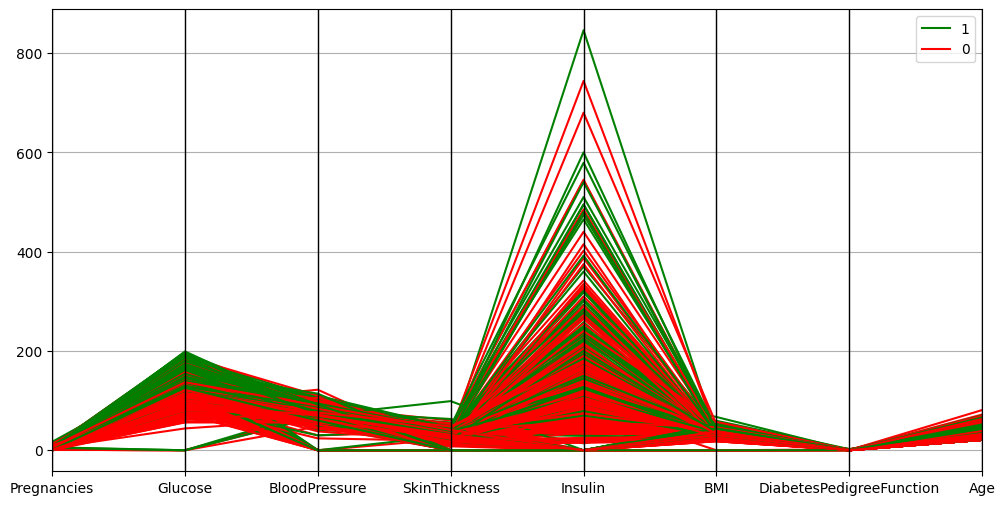

In [62]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['green', 'red'])
plt.show()

El gráfico muestra una tendencia en mayor valores de glucosa para los diabeticos y mayor incidencia de embarazadas dieabeticas respecto a las no embarazadas, tiene sentido porque la prueba de diabetes gestacional se hace a todas las mujeres embarazadas y no a todas las mujeres en general.

In [63]:
#TRAIN Y TEST

X= df.drop("Outcome", axis=1)
y= df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selec_model = SelectKBest(k = 7)
selec_model.fit(X_train, y_train)
modelo = selec_model.get_support()

X_train_sel = pd.DataFrame(selec_model.transform(X_train), columns = X_train.columns.values[modelo])
X_test_sel = pd.DataFrame(selec_model.transform(X_test), columns = X_test.columns.values[modelo])

X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index= False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index= False) 

total_datos = pd.concat([X_train_sel, X_test_sel])
total_datos.head()

#He utilizado la k = int(len(X_train.columns) * 0.3) pero me salen solo 3 columnas, por lo que me parecen muy pocas asi que he cambiado al 0.7 y me salen 6 predictores



,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


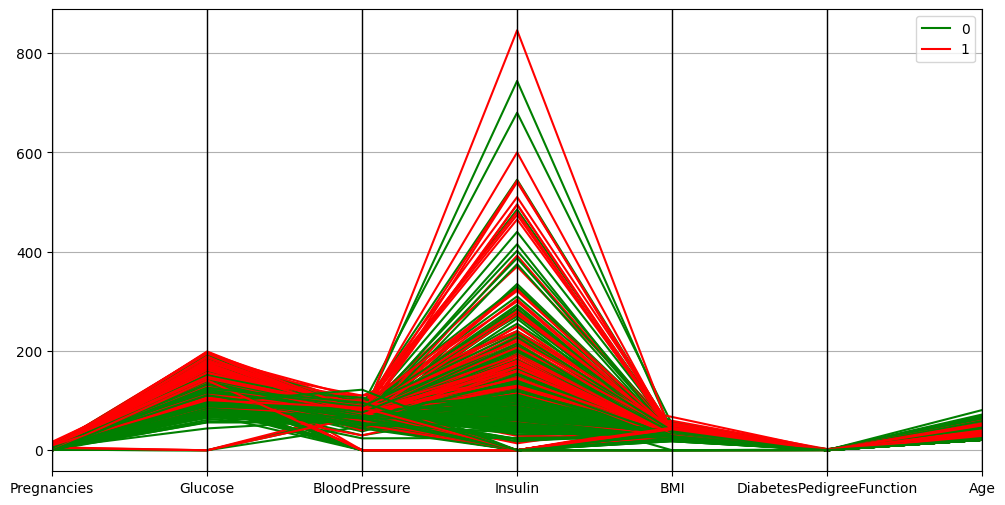

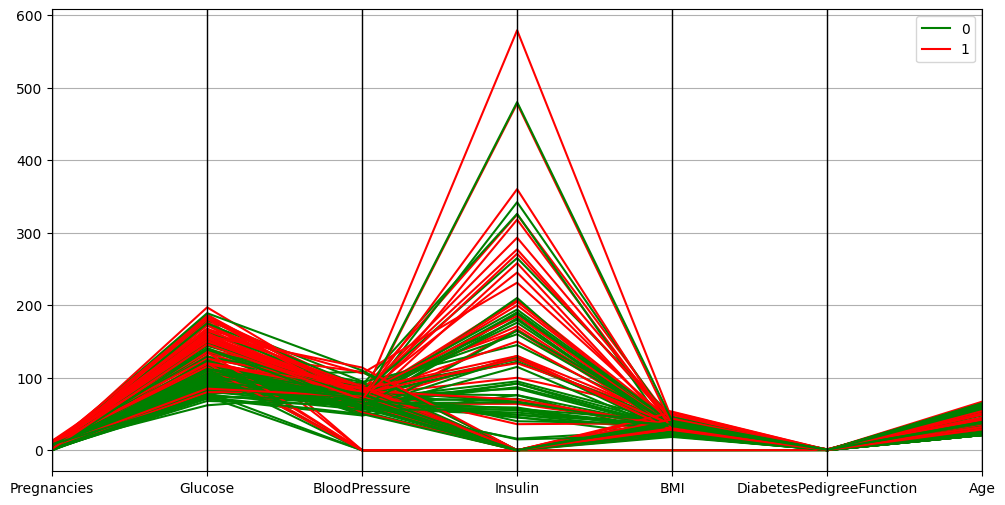

In [64]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(X_train_sel, 'Outcome', color=['green', 'red'])  
plt.show()

plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(X_test_sel, 'Outcome', color=['green', 'red']) 
plt.show()

#Por alguna razón se han invertido los significados de 0 y 1, en el df 0 era positivo en diabetes y aqui es el 1.

In [65]:
X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [66]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0,0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0,0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0,0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0,0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0,0


[Text(0.5, 0.875, 'Age <= 28.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = N'),
 Text(0.25, 0.625, 'Glucose <= 127.5\ngini = 0.304\nsamples = 300\nvalue = [244, 56]\nclass = N'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]\nclass = N'),
 Text(0.375, 0.375, 'SkinThickness <= 31.5\ngini = 0.5\nsamples = 79\nvalue = [40, 39]\nclass = N'),
 Text(0.3125, 0.125, 'gini = 0.471\nsamples = 50\nvalue = [31, 19]\nclass = N'),
 Text(0.4375, 0.125, 'gini = 0.428\nsamples = 29\nvalue = [9, 20]\nclass = P'),
 Text(0.75, 0.625, 'BMI <= 27.85\ngini = 0.5\nsamples = 314\nvalue = [157, 157]\nclass = N'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Glucose <= 123.0\ngini = 0.358\nsamples = 77\nvalue = [59, 18]\nclass = N'),
 Text(0.5625, 0.125, 'gini = 0.17

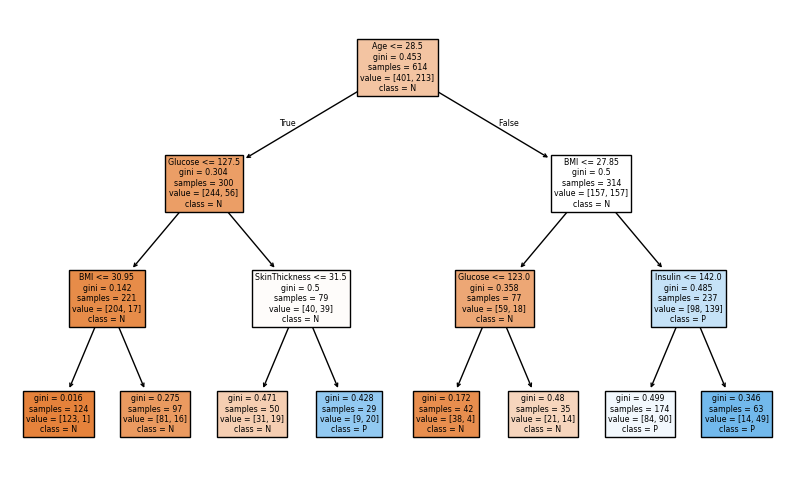

In [78]:
#ARBOL DE DECISIÓN
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

dtc= DecisionTreeClassifier

complex_tree = dtc(max_depth=100, min_samples_leaf=1, random_state=42).fit(X_train, y_train)
simple_tree = dtc(max_depth=3, min_samples_leaf=20, max_features=X_train.shape[1]//2, random_state=42).fit(X_train, y_train)

y_pred_train_complex = complex_tree.predict(X_train)
y_pred_test_complex = complex_tree.predict(X_test)

y_pred_train_simple = simple_tree.predict(X_train)
y_pred_test_simple = simple_tree.predict(X_test)


plt.figure(figsize=(10,6))
plot_tree(simple_tree, feature_names=list(X_train.columns), class_names=['N', 'P'], filled=True)

[Text(0.4602238581730769, 0.9642857142857143, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = N'),
 Text(0.1650390625, 0.8928571428571429, 'Age <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]\nclass = N'),
 Text(0.31263146033653844, 0.9285714285714286, 'True  '),
 Text(0.06009615384615385, 0.8214285714285714, 'BMI <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]\nclass = N'),
 Text(0.019230769230769232, 0.75, 'DiabetesPedigreeFunction <= 0.672\ngini = 0.016\nsamples = 124\nvalue = [123, 1]\nclass = N'),
 Text(0.009615384615384616, 0.6785714285714286, 'gini = 0.0\nsamples = 108\nvalue = [108, 0]\nclass = N'),
 Text(0.028846153846153848, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.686\ngini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = N'),
 Text(0.019230769230769232, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = P'),
 Text(0.038461538461538464, 0.6071428571428571, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]\ncla

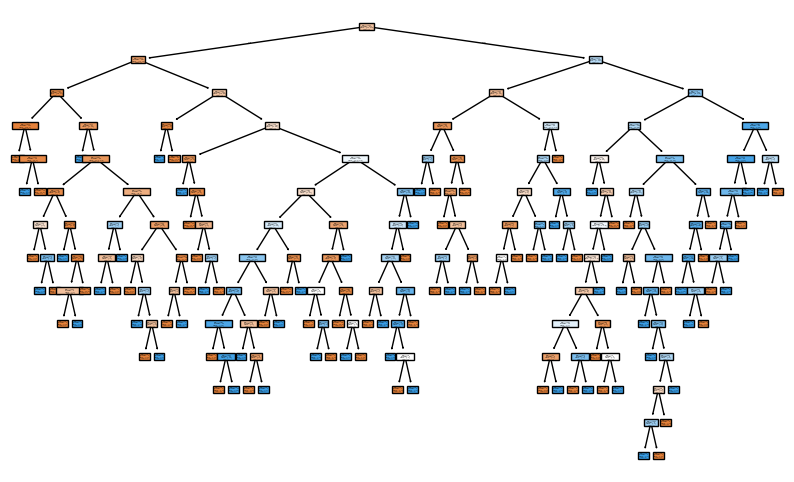

In [72]:
plt.figure(figsize=(10,6))
plot_tree(complex_tree, feature_names=list(X_train.columns), class_names=['N', 'P'], filled=True)

In [93]:
#METRICAS PARA SABER QUE ÁRBOL DE DECISIÓN ES EL MEJOR (PODRÍA HABERLO HECHO ANTES PERO QUERÍA VER LOS DOS)

metricas = {"Exactitud": accuracy_score,"Precisión": precision_score, "Sensibilidad": recall_score, "F1": f1_score,"AUC": roc_auc_score}

def get_metrics(y_train, y_test, y_pred_train, y_pred_test):

    results = {"Train": [], "Test": [], "Diferencia": []}
    
    
    for metric_name, metric_func in metricas.items():
        train_value = metric_func(y_train, y_pred_train)
        test_value = metric_func(y_test, y_pred_test)
        results["Train"].append(train_value)
        results["Test"].append(test_value)
        results["Diferencia"].append(train_value - test_value)

    metricas_df = pd.DataFrame(results, index=metricas.keys())
    
    return metricas_df


metricas_df_simple = get_metrics(y_train, y_test, y_pred_train_simple, y_pred_test_simple)
metricas_df_complex = get_metrics(y_train, y_test, y_pred_train_complex, y_pred_test_complex)

print("Las métricas del modelo simple son")
print(metricas_df_simple)
print("Las métricas del modelo complejo son:")
print(metricas_df_complex)
    

Las métricas del modelo simple son
                 Train      Test  Diferencia
Exactitud     0.737785  0.636364    0.101421
Precisión     0.597744  0.493976    0.103768
Sensibilidad  0.746479  0.745455    0.001024
F1            0.663883  0.594203    0.069680
AUC           0.739823  0.660606    0.079217
Las métricas del modelo complejo son:
              Train      Test  Diferencia
Exactitud       1.0  0.746753    0.253247
Precisión       1.0  0.625000    0.375000
Sensibilidad    1.0  0.727273    0.272727
F1              1.0  0.672269    0.327731
AUC             1.0  0.742424    0.257576


El modelo complejo parece estar sobreajustado y el modelo simple tiene unas metrias aceptables aunque no muy buenas

In [114]:

#OPTIMIZAR EL ARBOL 

param_grid = {"criterion": ["gini", "entropy"],"max_depth": [3, 5, 10, None],"min_samples_split": [2, 5, 10],"min_samples_leaf": [1, 2, 4]}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

arbol_opti= DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
arbol_opti.fit(X_train, y_train)



Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [116]:
#COMPROBAR PARÁMETROS OPTIMIZADOS 

arbol_opti= DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
arbol_opti.fit(X_train, y_train)

y_pred_train_opti = arbol_opti.predict(X_train)
y_pred_test_opti = arbol_opti.predict(X_test)

y_pred_opti = arbol_opti.predict(X_test)
metricas_df_opti = get_metrics(y_train, y_test, y_pred_train_opti, y_pred_test_opti)

print(metricas_df_opti)

                 Train      Test  Diferencia
Exactitud     0.812704  0.779221    0.033483
Precisión     0.737864  0.684211    0.053654
Sensibilidad  0.713615  0.709091    0.004524
F1            0.725537  0.696429    0.029108
AUC           0.789476  0.763636    0.025839


In [117]:
#GUARDAR

dump(arbol_opti, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))